In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [3]:
df=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/pjm/pjm_train_data_covid_42days_component.csv', parse_dates=['date'])

In [4]:
df.head()

,Unnamed: 0,date,total_load,daily_mean_temp,full_time_work_behavior_devices,completely_home_device_count,Restaurant_Recreaction,Retail,trans,LocalLinearTrend,Weekly,Dynamic,full_time_coefficients,completely_coefficients,Restaurant_coefficients,Retail_coefficients
0,1,2019-01-01,95431.0,11.547083,2223,51869,37072,56352,93424,92952.015382,1338.162396,1244.046922,0.654223,-0.109322,-0.281593,0.282143
1,2,2019-01-02,110553.2,4.755000,5439,47162,42769,70046,112815,95007.458705,2838.291752,12556.199172,0.675479,0.014297,-0.276899,0.286250
2,3,2019-01-03,111171.9,5.219167,5657,43244,47468,77281,124749,95122.443275,2398.560120,13709.637720,0.677056,0.021377,-0.276354,0.285621
3,4,2019-01-04,113451.7,4.229167,5839,42709,53551,86552,140103,95866.354483,786.789531,16707.237412,0.681927,0.062370,-0.274272,0.285946
4,5,2019-01-05,102713.4,7.067917,2129,51608,44757,74205,118962,94786.945145,-4058.697373,12074.996660,0.686850,0.040717,-0.280381,0.283814


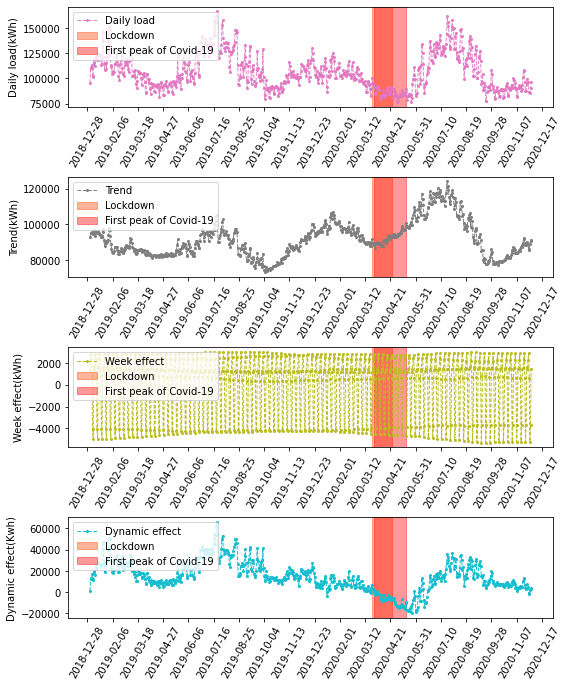

In [7]:
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]

fig = plt.figure()
fig.set_size_inches(8,10)
ax = fig.add_subplot(4, 1, 1)
ax.plot(df['date'], df['total_load'], lw=1, label="Daily load", c=c7,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Daily load(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 2)
ax.plot(df['date'], df['LocalLinearTrend'], lw=1, label="Trend", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Trend(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 3)
ax.plot(df['date'], df['Weekly'], lw=1, label="Week effect", c=c9,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Week effect(kWh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

ax = fig.add_subplot(4, 1, 4)
ax.plot(df['date'], df['Dynamic'], lw=1, label="Dynamic effect", c=c10,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Dynamic effect(Kwh)")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

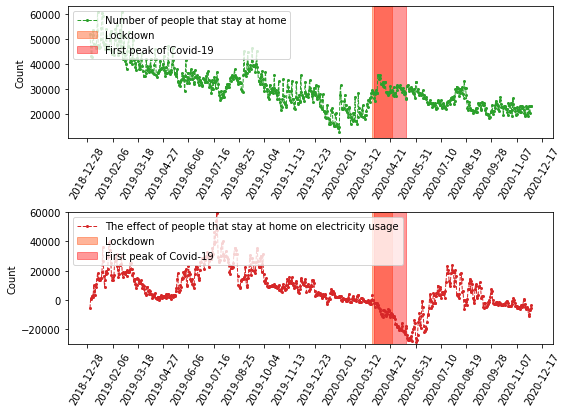

In [14]:
#colors = sns.color_palette()
#c1, c2, c3, c4, c5, c6 = colors[0], colors[1], colors[2], colors[3], colors[4], colors[5]

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['completely_home_device_count'], lw=1, label="Number of people that stay at home", c=c3,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['completely_home_device_count']*df['completely_coefficients'], lw=1, label="The effect of people that stay at home on electricity usage", c=c4,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
ax.set_ylim([-30000, 60000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

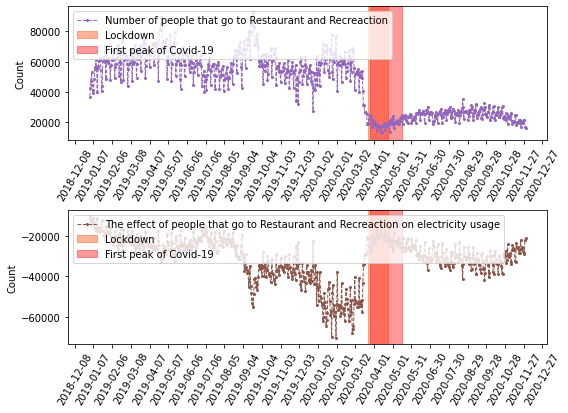

In [11]:

fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Restaurant_Recreaction'], lw=1, label="Number of people that go to Restaurant and Recreaction", c=c5,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([10000, 500000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Restaurant_Recreaction']*df['Restaurant_coefficients'], lw=1, label="The effect of people that go to Restaurant and Recreaction on electricity usage", c=c6,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([-40000, 10000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

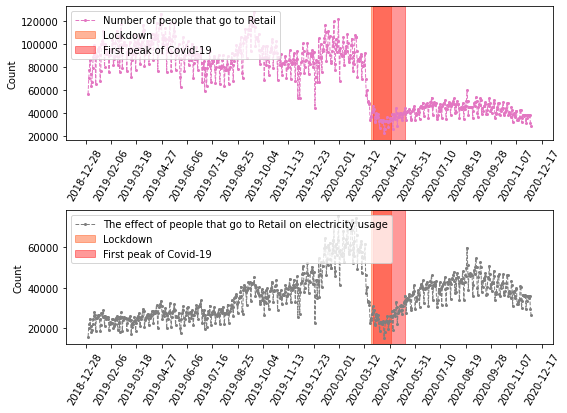

In [12]:
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(2, 1, 1)
ax.plot(df['date'], df['Retail'], lw=1, label="Number of people that go to Retail", c=c7,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([1000, 50000])

ax = fig.add_subplot(2, 1, 2)
ax.plot(df['date'], df['Retail']*df['Retail_coefficients'], lw=1, label="The effect of people that go to Retail on electricity usage", c=c8,alpha=1,linestyle='dashed',marker='o',markersize=2)
ax.axvspan('2020-03-23', '2020-04-23', label='Lockdown',alpha=0.4, color='orangered')
ax.axvspan('2020-03-26', '2020-05-15', label='First peak of Covid-19',alpha=0.4, color='red')
ax.set_ylabel("Count")
#ax.set_title("Los Angeles")
ax.legend( loc = 'upper left')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
#ax.set_ylim([-2000, 3000])

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()